# IMPORT 

In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime
np.random.seed(42)

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("data_retails.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

# DATA CLEANING

In [4]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [5]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [6]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [7]:
data = df1.append(df2)

In [8]:
data.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
3    489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4    489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2009-12-01 07:45:00       6.95     13085.0  United Kingdom  
1 2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
2 2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
3 2009-12-01 07:45:00       2.10     13085.0  United Kingdom  
4 2009-12-01 07:45:00       1.25     13085.0  United Kingdom

In [9]:
data.shape

(1067371, 8)

In [10]:
data.isnull().sum()/data.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     22.766873
Country         0.000000
dtype: float64

In [11]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description", "CustomerID"], inplace = True)

In [12]:
data.isnull().sum() #Now let's check the data before droping these customer ID's

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Exploratory data analysis (EDA)

In [13]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [14]:
temp_df.head(10)

Country
United Kingdom   741301
Germany           17624
EIRE              16195
France            14202
Netherlands        5140
Spain              3811
Belgium            3123
Switzerland        3064
Portugal           2504
Australia          1913

In [15]:
names  = temp_df.index

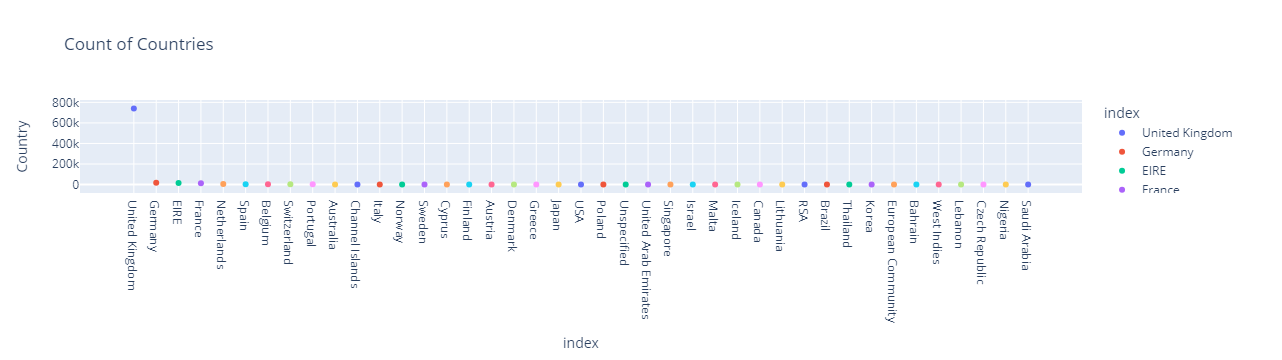

In [16]:
px.scatter(temp_df, y = "Country", color = names, title = "Count of Countries")

In [17]:
#Now let's check the total quantity and by country
data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10)
#data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)

Country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: Quantity, dtype: int64

In [18]:
data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)

Country
RSA                   943
Bahrain               755
Korea                 598
Czech Republic        592
Brazil                545
European Community    497
West Indies           395
Lebanon               386
Nigeria               103
Saudi Arabia           75
Name: Quantity, dtype: int64

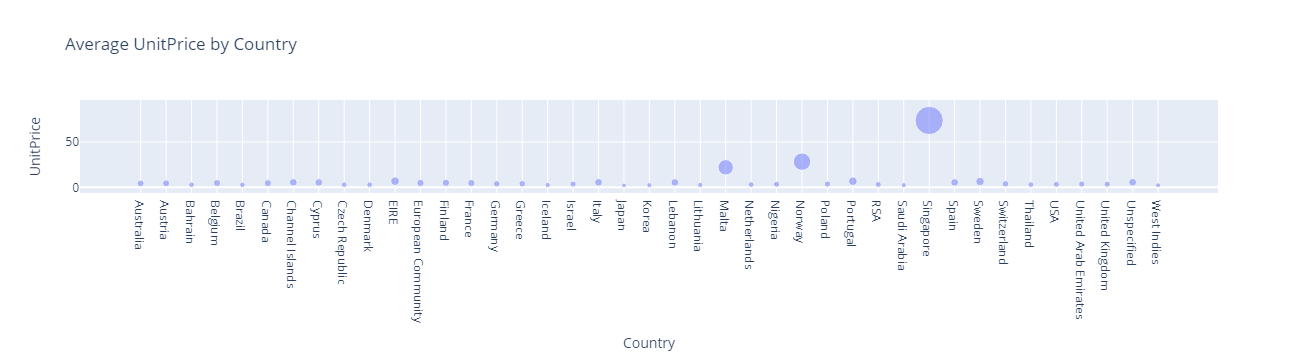

In [19]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y = "UnitPrice", size = "UnitPrice", title = "Average UnitPrice by Country", opacity = 0.48)

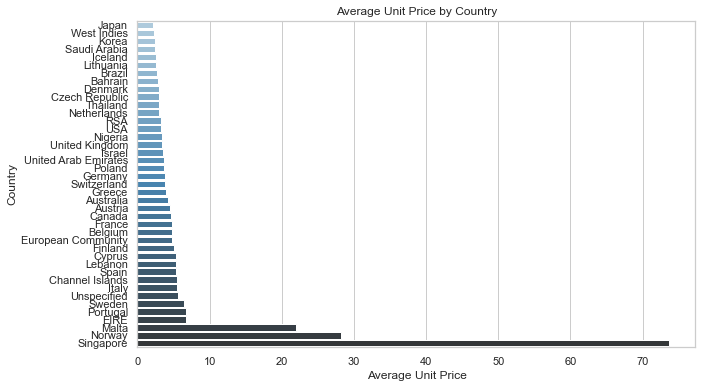

In [20]:
# Create a DataFrame with the average unit price by country
avg_unit_price_by_country = data.groupby("Country")["UnitPrice"].mean().reset_index().sort_values("UnitPrice", ascending=True)

# Create a horizontal bar chart using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="UnitPrice", y="Country", data=avg_unit_price_by_country, palette="Blues_d")

# Customize the chart
ax.set_xlabel("Average Unit Price")
ax.set_ylabel("Country")
ax.set_title("Average Unit Price by Country")

plt.show()

In [21]:
countries = data["Country"].unique()

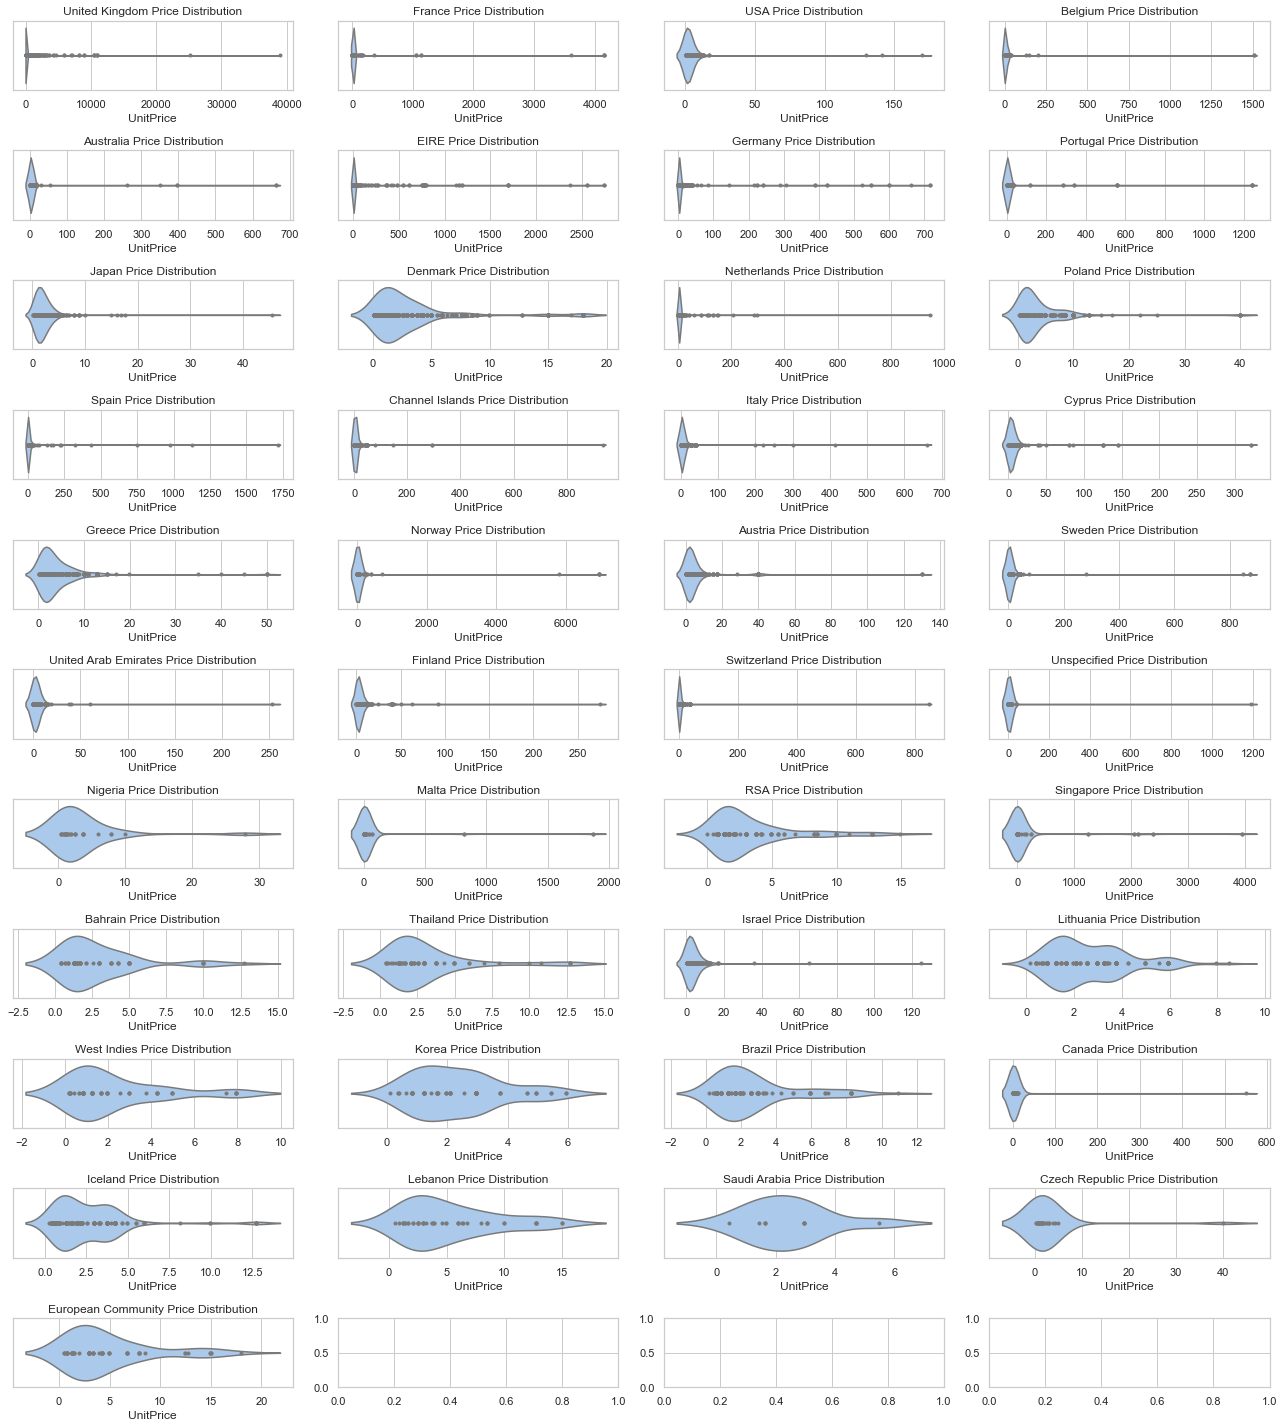

In [22]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "UnitPrice", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

In [23]:
#Total Number of Unique Invoices 
len(data["InvoiceNo"].unique())

44876

In [24]:
temp_invoice_df = data.groupby("InvoiceNo").sum()

In [25]:
temp_invoice_df.reset_index(inplace = True)

In [26]:
#Below are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

In [27]:
data.groupby(["InvoiceNo"]).mean().head(15).iloc[:, [1]].sort_values("UnitPrice", ascending = False)

UnitPrice
InvoiceNo            
489444     141.000000
489447     130.000000
489434       4.081250
489436       3.730526
489437       3.628261
489439       3.560000
489440       3.150000
489446       3.118519
489441       3.042500
489448       2.970000
489435       2.625000
489438       2.591176
489445       2.477895
489443       2.370000
489442       2.040870

In [28]:
data[(data["InvoiceNo"] == 489444) | (data["InvoiceNo"] == 489447)]

InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
126    489444      POST     POSTAGE         1 2009-12-01 09:55:00      141.0   
173    489447      POST     POSTAGE         1 2009-12-01 10:10:00      130.0   

     CustomerID  Country  
126     12636.0      USA  
173     12362.0  Belgium

<AxesSubplot:ylabel='Description'>

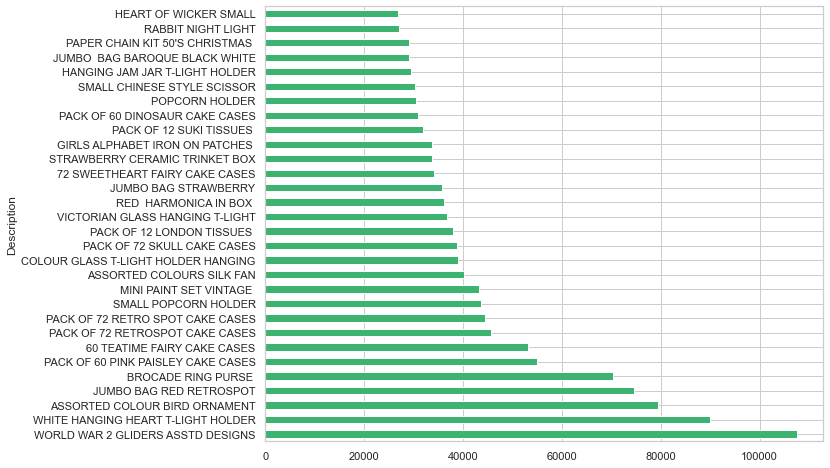

In [29]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
plt.ylabel("Description")
data.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "barh", color = 'mediumseagreen')

In [30]:
# check the range of dates in the InvoiceDate
print(data["InvoiceDate"].min())
print(data["InvoiceDate"].max())

2009-12-01 07:45:00
2011-12-09 12:50:00


In [31]:
temp_data = data.copy()

In [32]:
temp_data.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
3    489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4    489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2009-12-01 07:45:00       6.95     13085.0  United Kingdom  
1 2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
2 2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
3 2009-12-01 07:45:00       2.10     13085.0  United Kingdom  
4 2009-12-01 07:45:00       1.25     13085.0  United Kingdom

In [33]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [34]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [35]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping) 

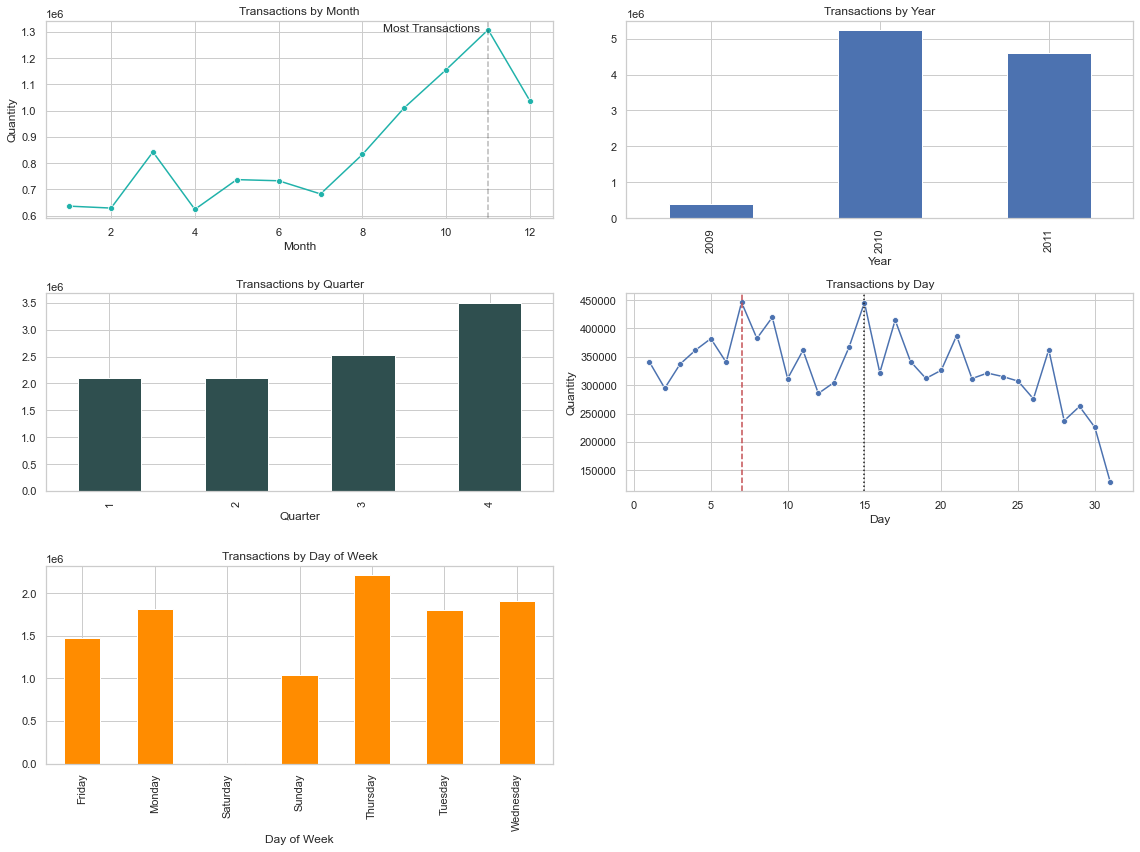

In [36]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
temp_data.groupby("Year").sum()["Quantity"].plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

In [37]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2010: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2010: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2011: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2011: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 23
Total Number of Transactions in 2009: 390286
--------------------------------------------
Total Number of Countries in 2010: 37
Total Number of Transactions in 2010: 5233315
--------------------------------------------
Total Number of Countries in 2011: 36
Total Number of Transactions in 2011: 4610527


In [38]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [39]:
no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [40]:
temp = data.groupby(["Country", "Description"]).sum()["Quantity"]

In [41]:
temp = pd.DataFrame(temp)

Country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: Quantity, dtype: int64
data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)
Country
RSA                   943
Bahrain               755
Korea                 598
Czech Republic        592
Brazil                545
European Community    497
West Indies           395
Lebanon               386
Nigeria               103
Saudi Arabia           75### Top 8 Countries With Most Transactions

In [42]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

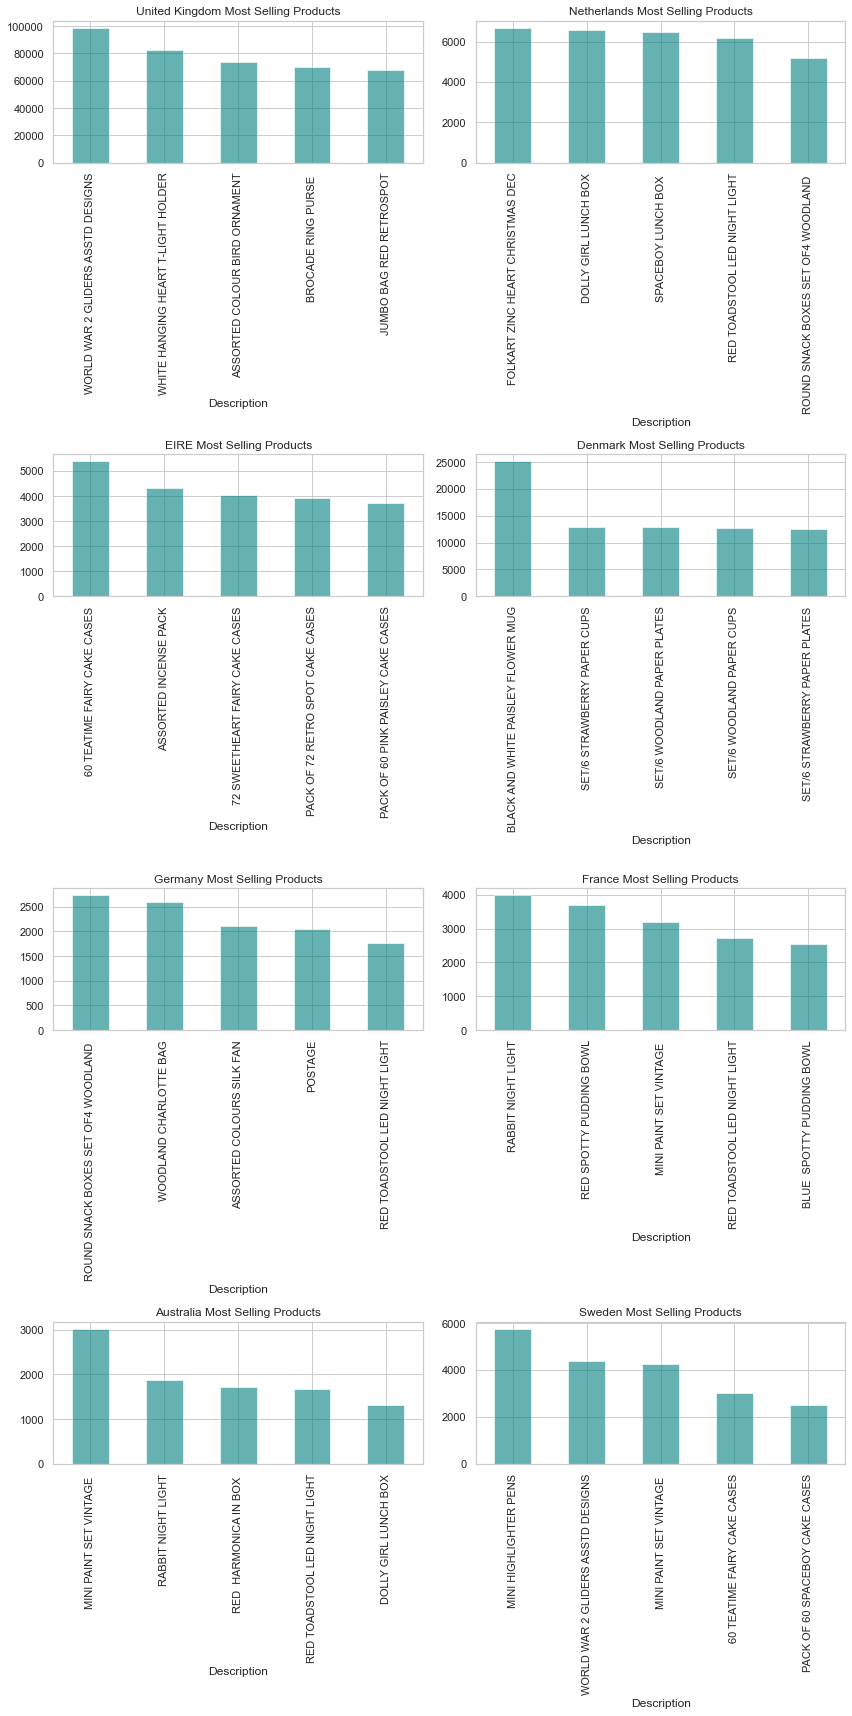

In [43]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

In [44]:
# Top 8 Countries with Least Transactions
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]

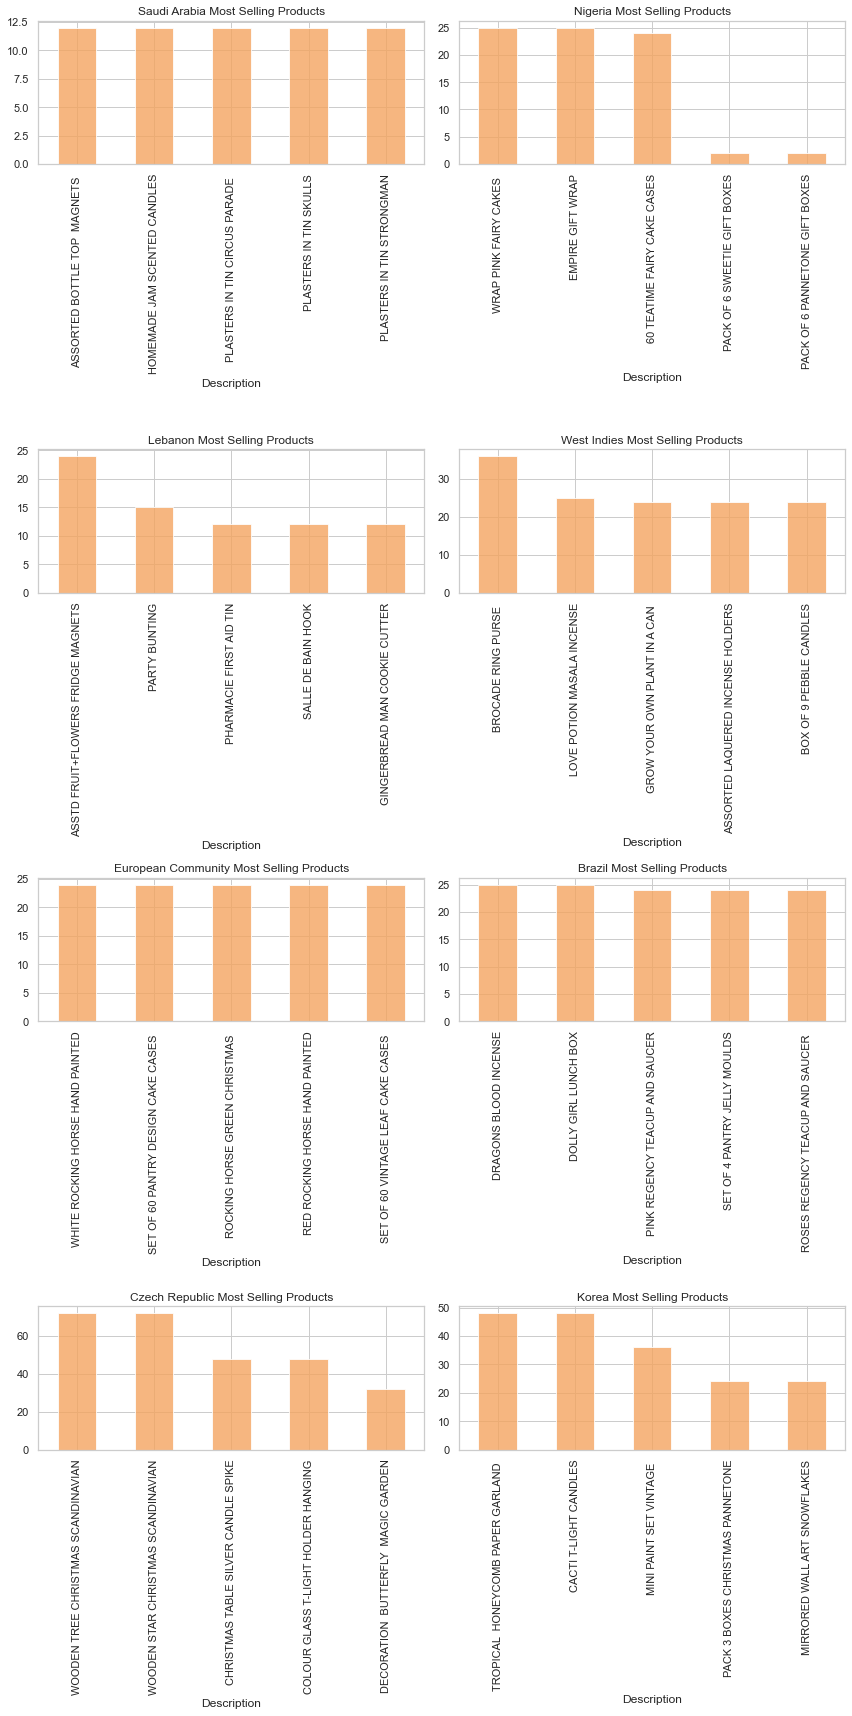

In [45]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)
    
    plt.tight_layout()

# RFM Estimation - (Recency, Frequency, Monetary)

In [46]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
3    489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4    489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2009-12-01 07:45:00       6.95     13085.0  United Kingdom  
1 2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
2 2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
3 2009-12-01 07:45:00       2.10     13085.0  United Kingdom  
4 2009-12-01 07:45:00       1.25     13085.0  United Kingdom

In [47]:
data["Total Amount"] = data["Quantity"]*data["UnitPrice"]

In [48]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
3    489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4    489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  UnitPrice  CustomerID         Country  Total Amount  
0 2009-12-01 07:45:00       6.95     13085.0  United Kingdom          83.4  
1 2009-12-01 07:45:00       6.75     13085.0  United Kingdom          81.0  
2 2009-12-01 07:45:00       6.75     13085.0  United Kingdom          81.0  
3 2009-12-01 07:45:00       2.10     13085.0  United Kingdom         100.8  
4 2009-12-01 07:45:00       1.25     13085.0  United Kingdom          30.0

In [49]:
import lifetimes

In [50]:
rfm_summary = lifetimes.utils.summary_data_from_transaction_data(data, "CustomerID", "InvoiceDate", "Total Amount")

In [51]:
rfm_summary.head()

frequency  recency      T  monetary_value
CustomerID                                           
12346.0          10.0    400.0  725.0      -15.468000
12347.0           7.0    402.0  404.0      717.398571
12348.0           4.0    363.0  438.0      449.310000
12349.0           4.0    717.0  735.0     1107.172500
12350.0           0.0      0.0  310.0        0.000000

In [52]:
rfm_summary.reset_index(inplace = True)

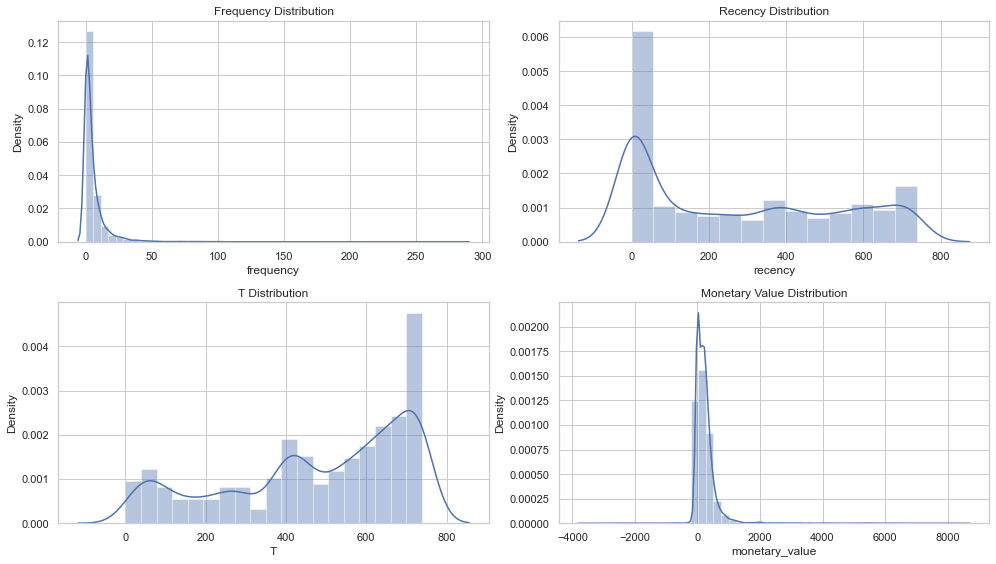

In [53]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm_summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(rfm_summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(rfm_summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(rfm_summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

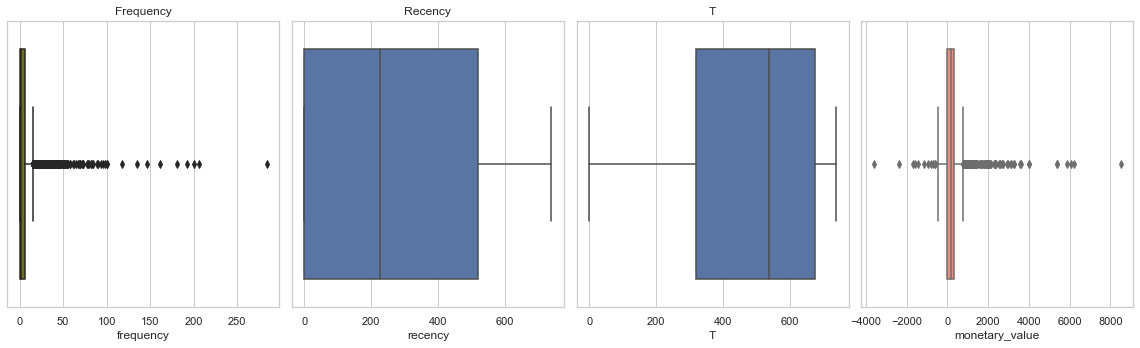

In [54]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm_summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm_summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm_summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(rfm_summary["monetary_value"], color = "salmon")

plt.tight_layout()

In [55]:
rfm_summary.describe(percentiles = [0.01,0.1,0.25,0.50,0.75,0.90,0.99])

CustomerID    frequency      recency            T  monetary_value
count   5942.000000  5942.000000  5942.000000  5942.000000     5942.000000
mean   15316.500000     5.479636   275.772299   478.229384      228.814496
std     1715.451981    11.293673   259.830840   223.879537      363.067124
min    12346.000000     0.000000     0.000000     0.000000    -3610.500000
1%     12405.410000     0.000000     0.000000    15.000000      -40.623900
10%    12940.100000     0.000000     0.000000    89.000000        0.000000
25%    13831.250000     0.000000     0.000000   320.500000        0.000000
50%    15316.500000     2.000000   225.000000   536.000000      174.900625
75%    16801.750000     6.000000   518.000000   674.000000      314.594375
90%    17692.900000    13.000000   672.900000   731.000000      502.095625
99%    18227.590000    44.590000   734.000000   738.000000     1328.480453
max    18287.000000   284.000000   738.000000   738.000000     8513.271143

# PARETO/NBD MODEL

In [56]:
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt

In [57]:
def get_model(data, penalizer_val, time):
    
    pareto_result = data.copy()

    pareto_model = ParetoNBDFitter(penalizer_coef = penalizer_val)
    pareto_model.fit(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

    #calculating the predicted_purchases

    t = time

    pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])


    pareto_result["Actual_Purchases"] = pareto_result["frequency"]/pareto_result["recency"]*time

    #filling the null values
    pareto_result["Actual_Purchases"].fillna(0, inplace = True)


    #calculating the error
    pareto_result["Prediction_Error"] = pareto_result["Actual_Purchases"]-pareto_result["predicted_purchases"]

    #calcuating the purchase prediction error
    pareto_mse_purchase = mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_r2_purchase = r2_score(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_rmse_purchase = sqrt(mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"]))
    pareto_avg_error_purchase = pareto_result["Prediction_Error"].mean()
    
    #printing the purchase prediction error
    print("Predicted Purchase Mean Squared Error: %s" %(pareto_mse_purchase))
    print("Predicted Purchase R2 Score: %s" %(pareto_r2_purchase))
    print("Predicted Purchase Root Mean Squared Error: %s" %(pareto_rmse_purchase))
    print("Predicted Purchase Average Purchases Error: %s" %(pareto_avg_error_purchase))
    
    
    #plotting the prediction v/s actual purchase plot
    plt.figure(figsize=(6,4))
    plt.errorbar(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"], yerr=pareto_result["Prediction_Error"], fmt='o', color='darkseagreen',
                 ecolor='grey', elinewidth=1.5, capsize=0, alpha = 0.2);
    plt.title("Prediction v/s Actual")

Predicted Purchase Mean Squared Error: 4.335934568785449
Predicted Purchase R2 Score: 0.004258462996240442
Predicted Purchase Root Mean Squared Error: 2.0822907022760893
Predicted Purchase Average Purchases Error: 0.4123654498211612


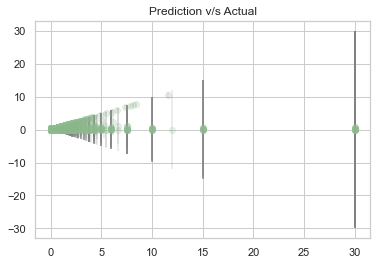

In [58]:
get_model(rfm_summary, 0.001, 30)

In [59]:
pareto_model = lifetimes.ParetoNBDFitter(penalizer_coef = 0.1)

In [60]:
pareto_model.fit(rfm_summary["frequency"],rfm_summary["recency"],
                rfm_summary["T"])

<lifetimes.ParetoNBDFitter: fitted with 5942 subjects, alpha: 63.87, beta: 124.21, r: 0.83, s: 0.16>

<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

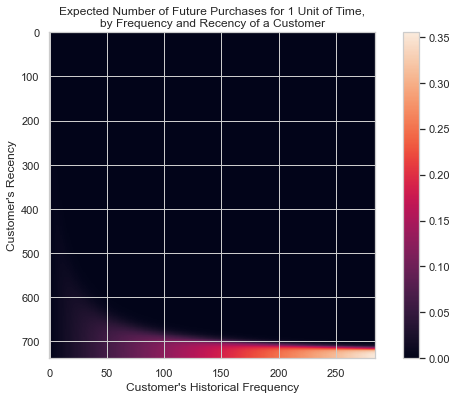

In [61]:
plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(pareto_model)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

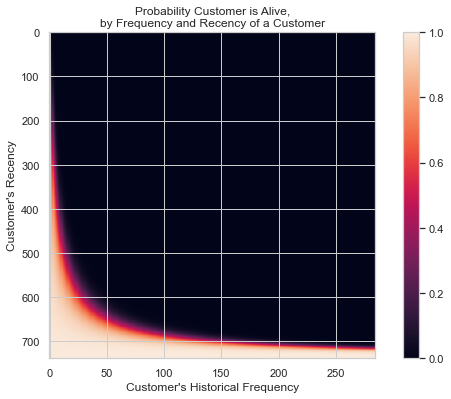

In [62]:
plt.figure(figsize=(10,6))
plot_probability_alive_matrix(pareto_model)

In [63]:
pareto_result = rfm_summary.copy()

In [64]:
pareto_result["p_not_alive"] = 1-pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])
pareto_result["p_alive"] = pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [65]:
pareto_result.head()

CustomerID  frequency  recency      T  monetary_value  p_not_alive  \
0     12346.0       10.0    400.0  725.0      -15.468000     0.819891   
1     12347.0        7.0    402.0  404.0      717.398571     0.000634   
2     12348.0        4.0    363.0  438.0      449.310000     0.034895   
3     12349.0        4.0    717.0  735.0     1107.172500     0.003674   
4     12350.0        0.0      0.0  310.0        0.000000     0.334744   

    p_alive  
0  0.180109  
1  0.999366  
2  0.965105  
3  0.996326  
4  0.665256

In [66]:
t = 30
pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [67]:
pareto_result

CustomerID  frequency  recency      T  monetary_value  p_not_alive  \
0        12346.0       10.0    400.0  725.0      -15.468000     0.819891   
1        12347.0        7.0    402.0  404.0      717.398571     0.000634   
2        12348.0        4.0    363.0  438.0      449.310000     0.034895   
3        12349.0        4.0    717.0  735.0     1107.172500     0.003674   
4        12350.0        0.0      0.0  310.0        0.000000     0.334744   
...          ...        ...      ...    ...             ...          ...   
5937     18283.0       18.0    655.0  658.0      146.405556     0.000657   
5938     18284.0        1.0      2.0  431.0      -25.000000     0.730097   
5939     18285.0        0.0      0.0  660.0        0.000000     0.523576   
5940     18286.0        2.0    247.0  723.0      362.740000     0.417540   
5941     18287.0        6.0    696.0  738.0      697.165000     0.009871   

       p_alive  predicted_purchases  
0     0.180109             0.073997  
1     0.999366             0.499741  
2     0.965105             0.277710  
3     0.996326             0.180374  
4     0.665256             0.044305  
...        ...                  ...  
5937  0.999343             0.779793  
5938  0.269903             0.029887  
5939  0.476424             0.016428  
5940  0.582460             0.062766  
5941  0.990129             0.252460  

[5942 rows x 8 columns]

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

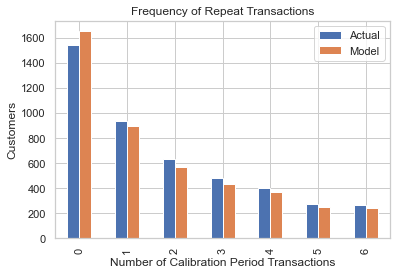

In [68]:
plot_period_transactions(pareto_model)

In [69]:
#dividing our dataset into training & holdout
pareto_summary_cal_holdout = calibration_and_holdout_data(data, "CustomerID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [70]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
CustomerID                                                         
12346.0              10.0        400.0  541.0                0.0   
12347.0               3.0        158.0  220.0                4.0   
12348.0               3.0        190.0  254.0                1.0   
12349.0               3.0        328.0  551.0                1.0   
12350.0               0.0          0.0  126.0                0.0   

            duration_holdout  
CustomerID                    
12346.0                184.0  
12347.0                184.0  
12348.0                184.0  
12349.0                184.0  
12350.0                184.0

In [71]:
pareto_model.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 5025 subjects, alpha: 63.81, beta: 801.34, r: 0.83, s: 0.76>

In [72]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

<AxesSubplot:title={'center':'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

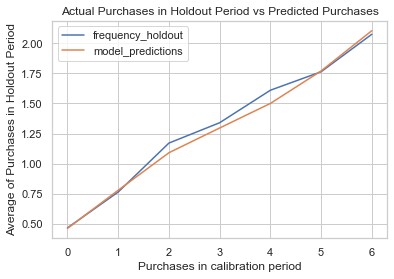

In [73]:
plot_calibration_purchases_vs_holdout_purchases(pareto_model, pareto_summary_cal_holdout)

In [74]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
CustomerID                                                         
12346.0              10.0        400.0  541.0                0.0   
12347.0               3.0        158.0  220.0                4.0   
12348.0               3.0        190.0  254.0                1.0   
12349.0               3.0        328.0  551.0                1.0   
12350.0               0.0          0.0  126.0                0.0   

            duration_holdout  
CustomerID                    
12346.0                184.0  
12347.0                184.0  
12348.0                184.0  
12349.0                184.0  
12350.0                184.0

In [75]:
#The purpose of multiplying by 30 is to estimate the expected number of transactions over a 30-day period.
pareto_result["actual30"] = pareto_result["frequency"]/pareto_result["recency"]*30

In [76]:
pareto_result["actual30"].fillna(0, inplace = True)

In [77]:
pareto_result["error"] = pareto_result["actual30"]-pareto_result["predicted_purchases"]

In [78]:
pareto_result.head()

CustomerID  frequency  recency      T  monetary_value  p_not_alive  \
0     12346.0       10.0    400.0  725.0      -15.468000     0.819891   
1     12347.0        7.0    402.0  404.0      717.398571     0.000634   
2     12348.0        4.0    363.0  438.0      449.310000     0.034895   
3     12349.0        4.0    717.0  735.0     1107.172500     0.003674   
4     12350.0        0.0      0.0  310.0        0.000000     0.334744   

    p_alive  predicted_purchases  actual30     error  
0  0.180109             0.073997  0.750000  0.676003  
1  0.999366             0.499741  0.522388  0.022647  
2  0.965105             0.277710  0.330579  0.052869  
3  0.996326             0.180374  0.167364 -0.013010  
4  0.665256             0.044305  0.000000 -0.044305

## Calculating evaluation metrics (PARETO)

In [79]:
def get_metrics(true, predicted, error):
    
    print("Mean Squared Error: %s"%(mean_squared_error(true, predicted)))
    print("Root Mean Squared Error: %s"%(sqrt(mean_squared_error(true, predicted))))
    print("R2 Score: %s"%(r2_score(true, predicted)))
    
    sns.scatterplot(true, predicted, size = error, color = "darkolivegreen")
    plt.title("Actual Purchase v/s Predicted Purchase")
    plt.show()

Mean Squared Error: 4.335930944167503
Root Mean Squared Error: 2.0822898319320253
R2 Score: 0.0042592953848726856


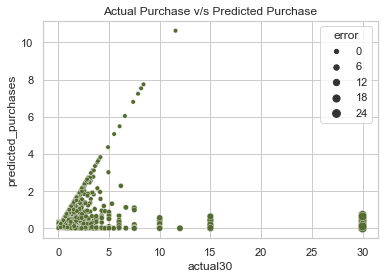

In [80]:
get_metrics(pareto_result["actual30"], pareto_result["predicted_purchases"], pareto_result["error"])

In [81]:
from lifetimes.plotting import plot_history_alive

In [82]:
#Get the history alive plot to check whether the customer is alive or not

def get_history_alive(t_, data_, id_):
    
    individual_alive = data[data["CustomerID"] == id_]
    plot_history_alive(pareto_model, t = t_, transactions = individual_alive, datetime_col = "InvoiceDate",
                  freq = "D")

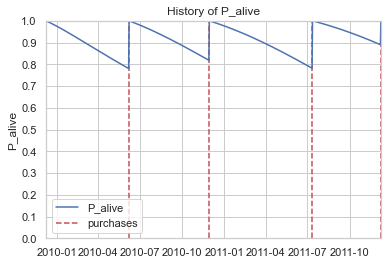

In [83]:
get_history_alive(30, data, 12358.0)

# GAMMA-GAMMA MODEL

In [84]:
idx = pareto_result[(pareto_result["frequency"] <= 0.0)]

In [85]:
idx = idx.index

In [86]:
ggf_filter = pareto_result.drop(idx, axis = 0)

In [87]:
m_idx = ggf_filter[(ggf_filter["monetary_value"] <= 0.0)].index

In [88]:
ggf_filter = ggf_filter.drop(m_idx, axis = 0)

In [89]:
ggf_filter.reset_index().drop("index", axis = 1, inplace = True)

<AxesSubplot:>

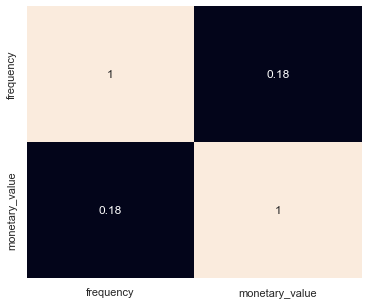

In [90]:
plt.figure(figsize=(6,5))
sns.heatmap(ggf_filter[["frequency", "monetary_value"]].corr(), annot = True, cbar = False)

In [91]:
ggf_model =  lifetimes.GammaGammaFitter(penalizer_coef=0.1)

In [92]:
ggf_model.fit(ggf_filter["frequency"], ggf_filter["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.02, q: 0.19, v: 0.95>

In [93]:
ggf_model.summary

coef  se(coef)  lower 95% bound  upper 95% bound
p  1.023190  0.024652         0.974873         1.071508
q  0.185956  0.003114         0.179852         0.192060
v  0.947145  0.025498         0.897169         0.997122

In [94]:
ggf_filter["expected_avg_sales_"] = ggf_model.conditional_expected_average_profit(ggf_filter["frequency"],
                                                                                     ggf_filter["monetary_value"])

In [95]:
ggf_filter.head()

CustomerID  frequency  recency      T  monetary_value  p_not_alive  \
1     12347.0        7.0    402.0  404.0      717.398571     0.000634   
2     12348.0        4.0    363.0  438.0      449.310000     0.034895   
3     12349.0        4.0    717.0  735.0     1107.172500     0.003674   
6     12352.0        8.0    356.0  392.0      218.182500     0.017281   
7     12353.0        1.0    204.0  408.0       89.000000     0.126935   

    p_alive  predicted_purchases  actual30     error  expected_avg_sales_  
1  0.999366             0.499741  0.522388  0.022647           809.543574  
2  0.965105             0.277710  0.330579  0.052869           561.160804  
3  0.996326             0.180374  0.167364 -0.013010          1382.358199  
6  0.982719             0.568668  0.674157  0.105490           242.408202  
7  0.873065             0.101370  0.147059  0.045689           440.041239

## Calculating evaluation metrics (GAMMA)

In [96]:
print("Mean Squared Error: %s" %(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"])))
print("Root Mean Squared Error: %s" %(sqrt(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"]))))
print("R2 Score: %s" %(r2_score(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"])))

Mean Squared Error: 793392.8848689708
Root Mean Squared Error: 890.7260436682935
R2 Score: -4.485799230636862


In [97]:
ggf_filter["predicted_clv"] = ggf_model.customer_lifetime_value(pareto_model,
                                                       ggf_filter["frequency"],
                                                       ggf_filter["recency"],
                                                       ggf_filter["T"],
                                                       ggf_filter["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [98]:
#Top 5 customers with high CLV
ggf_filter[["CustomerID", "predicted_clv"]].sort_values(by = "predicted_clv", ascending = False).head(5)

CustomerID  predicted_clv
5756     18102.0  494032.814713
2300     14646.0  426704.412842
5104     17450.0  252496.065476
1810     14156.0  239242.456161
1750     14096.0  225594.539175

In [99]:
# Assuming 5% of Profit Margin
ggf_filter["profit_margin"] = ggf_filter["predicted_clv"]*0.05

In [100]:
ggf_filter.reset_index().drop("index", axis = 1, inplace = True)

In [101]:
#exporting the result to csv
ggf_filter.to_csv("customer_lifetime_value_prediction.csv")

# CUSTOMER SEGMENTATION USING PREDICTED CLV

In [102]:
ggf_filter.head()

CustomerID  frequency  recency      T  monetary_value  p_not_alive  \
1     12347.0        7.0    402.0  404.0      717.398571     0.000634   
2     12348.0        4.0    363.0  438.0      449.310000     0.034895   
3     12349.0        4.0    717.0  735.0     1107.172500     0.003674   
6     12352.0        8.0    356.0  392.0      218.182500     0.017281   
7     12353.0        1.0    204.0  408.0       89.000000     0.126935   

    p_alive  predicted_purchases  actual30     error  expected_avg_sales_  \
1  0.999366             0.499741  0.522388  0.022647           809.543574   
2  0.965105             0.277710  0.330579  0.052869           561.160804   
3  0.996326             0.180374  0.167364 -0.013010          1382.358199   
6  0.982719             0.568668  0.674157  0.105490           242.408202   
7  0.873065             0.101370  0.147059  0.045689           440.041239   

   predicted_clv  profit_margin  
1    8446.886294     422.344315  
2    3153.812357     157.690618  
3    5372.047778     268.602389  
6    2827.890024     141.394501  
7     844.422261      42.221113

In [103]:
col = ["predicted_purchases", "expected_avg_sales_", "predicted_clv", "profit_margin"]

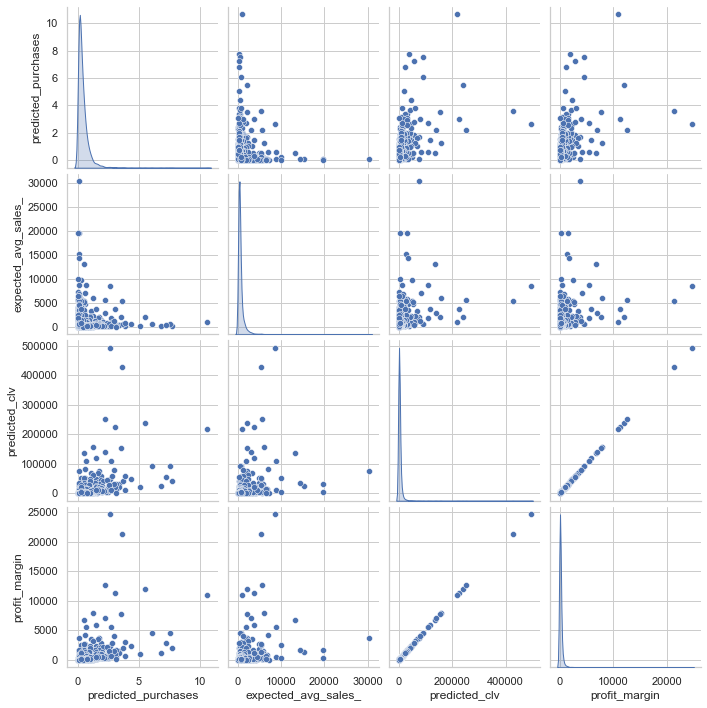

In [104]:
sns.pairplot(ggf_filter[col], diag_kind = "kde")

In [105]:
new_df = ggf_filter[col].reset_index(drop=True)

In [106]:
new_df

predicted_purchases  expected_avg_sales_  predicted_clv  profit_margin
0                0.499741           809.543574    8446.886294     422.344315
1                0.277710           561.160804    3153.812357     157.690618
2                0.180374          1382.358199    5372.047778     268.602389
3                0.568668           242.408202    2827.890024     141.394501
4                0.101370           440.041239     844.422261      42.221113
...                   ...                  ...            ...            ...
4180             0.080077           400.022878     630.826356      31.541318
4181             0.441465            64.211847     564.739568      28.236978
4182             0.779793           153.230929    2570.827752     128.541388
4183             0.062766           603.141334     555.630595      27.781530
4184             0.252460           803.922101    4333.592638     216.679632

[4185 rows x 4 columns]

In [107]:
from sklearn.cluster import KMeans

inertia = []

for i in range(2, 11):
    cluster = KMeans(n_clusters = i, init = "k-means++").fit(new_df)
    inertia.append(cluster.inertia_)
     

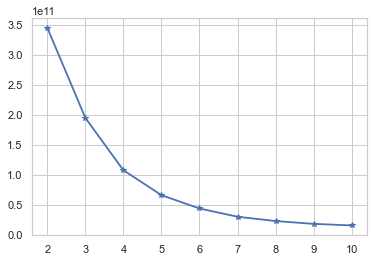

In [108]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker = "*", linewidth = 1.8)

In [109]:
k_model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 1000)

In [110]:
k_model_fit = k_model.fit(new_df)

In [111]:
new_df

predicted_purchases  expected_avg_sales_  predicted_clv  profit_margin
0                0.499741           809.543574    8446.886294     422.344315
1                0.277710           561.160804    3153.812357     157.690618
2                0.180374          1382.358199    5372.047778     268.602389
3                0.568668           242.408202    2827.890024     141.394501
4                0.101370           440.041239     844.422261      42.221113
...                   ...                  ...            ...            ...
4180             0.080077           400.022878     630.826356      31.541318
4181             0.441465            64.211847     564.739568      28.236978
4182             0.779793           153.230929    2570.827752     128.541388
4183             0.062766           603.141334     555.630595      27.781530
4184             0.252460           803.922101    4333.592638     216.679632

[4185 rows x 4 columns]

## Calculating evaluation metrics (KMEANS)

In [112]:
from sklearn import metrics

# Get the predicted labels for the data points
labels = k_model_fit.labels_


# Calculate evaluation metrics for kmeans
# Inertia (SSE)
sse = k_model_fit.inertia_

# Silhouette Coefficient
silhouette_avg = metrics.silhouette_score(new_df, labels)

# Calinski-Harabasz Index
ch_index = metrics.calinski_harabasz_score(new_df, labels)

# Davies-Bouldin Index
db_index = metrics.davies_bouldin_score(new_df, labels)

# Print the evaluation metrics
print("Inertia (SSE):", sse)
print("Silhouette Coefficient:", silhouette_avg)
print("Calinski-Harabasz Index:", ch_index)
print("Davies-Bouldin Index:", db_index)

Inertia (SSE): 108035688931.77072
Silhouette Coefficient: 0.871154455992865
Calinski-Harabasz Index: 10557.307053337823
Davies-Bouldin Index: 0.44404552737364367


In [113]:
centers = k_model_fit.cluster_centers_

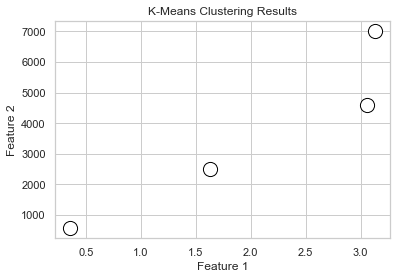

In [114]:
# Plot cluster centers as white circles with black edges
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.show()


In [115]:
centers

array([[3.59694329e-01, 5.60318094e+02, 2.98037478e+03, 1.49018739e+02],
       [3.12948129e+00, 7.02410745e+03, 4.60368614e+05, 2.30184307e+04],
       [3.06298105e+00, 4.60844095e+03, 1.69706586e+05, 8.48532931e+03],
       [1.63371935e+00, 2.49111257e+03, 3.38576964e+04, 1.69288482e+03]])

In [116]:
centers2 = centers[:, 2]
sorted_indices = np.argsort(centers2)[::-1]
centers2_sorted = centers2[sorted_indices]

In [117]:
# Get the columns to use for clustering
#cols = ['predicted_purchases', 'expected_avg_sales_', 'predicted_clv', 'profit_margin']

# Label the segments based on the centroids
segments = []
for i in range(len(new_df)):
    row = new_df.loc[i, "predicted_clv"]
    if np.all(row > centers2_sorted[0]):
        segments.append('V_High')
    elif np.all(row > centers2_sorted[1]):
        segments.append('High')
    elif np.all(row > centers2_sorted[2]):
        segments.append('Medium')
    else:
        segments.append('Low')

# Add segment labels to the dataframe
ggf_filter['Segment'] = segments

In [118]:
# labels = k_model_fit.labels_

# labels = pd.Series(labels, name = "Labels")

# labels.unique()

# ggf_filter = pd.concat([ggf_filter, labels], axis = 1)

# label_mapper = dict({0 : "Medium", 1: "V_High", 2: "High", 3: "Low"})

# ggf_filter["Labels"] = ggf_filter["Labels"].map(label_mapper)

In [119]:
#ggf_filter.groupby("Labels").mean().T

In [120]:
ggf_filter.groupby("Segment").mean().T

Segment                       High           Low        Medium         V_High
CustomerID            15051.800000  15303.814206  14930.125000   18102.000000
frequency               115.800000      7.128050     52.900000      70.000000
recency                 545.800000    387.561005    511.625000     738.000000
T                       550.400000    525.269630    521.450000     738.000000
monetary_value         3463.671247    311.862109   1679.668953    8513.271143
p_not_alive               0.002344      0.157092      0.008269       0.000000
p_alive                   0.997656      0.842908      0.991731       1.000000
predicted_purchases       4.987297      0.376797      2.180675       2.642611
actual30                  5.796578      0.732831      3.245835       2.845528
error                     0.809280      0.356034      1.065160       0.202918
expected_avg_sales_    3537.174253    585.915148   3843.043725    8611.155851
predicted_clv        272694.183675   3349.696597  68546.352137  494032.814713
profit_margin         13634.709184    167.484830   3427.317607   24701.640736

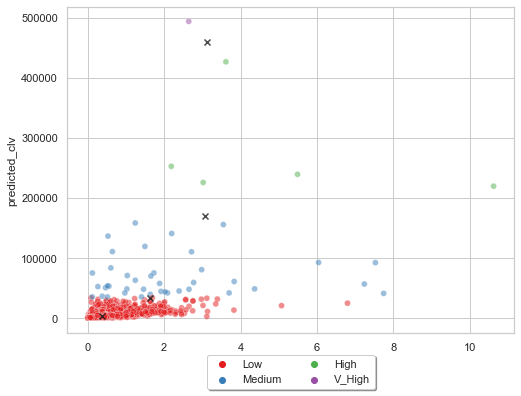

In [121]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "predicted_purchases", y = "predicted_clv", hue = "Segment", palette = "Set1", data = ggf_filter, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 2], marker = "x", color = "k", alpha = 0.8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

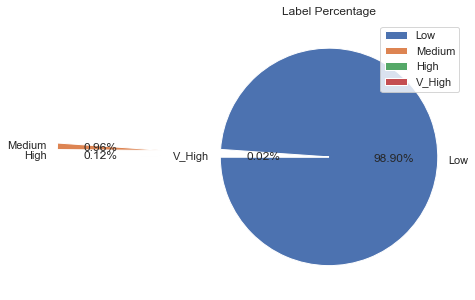

In [122]:
plt.figure(figsize=(5,5))
plt.pie(ggf_filter["Segment"].value_counts(), labels = ggf_filter["Segment"].unique(), startangle = 180, explode = [0.0,1.5,1.5,0.0], autopct = "%1.2f%%")
plt.title("Label Percentage")
plt.legend()

In [123]:
ggf_filter.columns

Index(['CustomerID', 'frequency', 'recency', 'T', 'monetary_value',
       'p_not_alive', 'p_alive', 'predicted_purchases', 'actual30', 'error',
       'expected_avg_sales_', 'predicted_clv', 'profit_margin', 'Segment'],
      dtype='object')

In [124]:
ggf_filter.to_csv("customer_segmentation_result.csv")

# BEST LOCATION FOR NEW STORES/BUSINESSES (HOTSPOT LOCATION)

In [125]:
high_segments = ggf_filter[(ggf_filter['Segment'] == 'V_High') | (ggf_filter['Segment'] == 'High')]
high_segments.head(3)

CustomerID  frequency  recency      T  monetary_value  p_not_alive  \
1750     14096.0       16.0     97.0  101.0     3568.791875     0.003642   
1810     14156.0      147.0    729.0  738.0     2010.189728     0.004437   
2300     14646.0       96.0    736.0  737.0     5391.989896     0.000203   

       p_alive  predicted_purchases  actual30     error  expected_avg_sales_  \
1750  0.996358             3.020220  4.948454  1.928234          3755.596667   
1810  0.995563             5.490762  6.049383  0.558621          2021.134964   
2300  0.999797             3.616352  3.913043  0.296692          5437.059039   

      predicted_clv  profit_margin Segment  
1750  225594.539175   11279.726959    High  
1810  239242.456161   11962.122808    High  
2300  426704.412842   21335.220642    High

In [126]:
high_segments = high_segments[['CustomerID','predicted_clv']]

In [127]:
# Join high_segments with data based on Customer ID
merged_df = high_segments.merge(data[['CustomerID', 'Country']], on='CustomerID')
merged_df['Country'].unique()

array(['United Kingdom', 'EIRE', 'Netherlands'], dtype=object)

In [128]:
import folium
from sklearn.cluster import KMeans

# Define the coordinates
uk_coords = (55.3781, -3.4360)
eire_coords = (53.4129, -8.2439)
netherlands_coords = (52.1326, 5.2913)
coordinates = [uk_coords, eire_coords, netherlands_coords]

# Fit the KMeans model
kmeans = KMeans(n_clusters=1, random_state=42).fit(coordinates)
centroids = kmeans.cluster_centers_

# Print the centroid
print("Centroid: ", centroids)

Centroid:  [[53.6412     -2.12953333]]


## Calculating evaluation metrics (KMEANS) for maps

In [129]:
# Get the predicted labels
predicted_labels = kmeans.labels_

# Calculate the evaluation metrics
sse = kmeans.inertia_
# silhouette_avg = metrics.silhouette_score(coordinates, predicted_labels)
# ch_index = metrics.calinski_harabasz_score(coordinates, predicted_labels)
#b_index = metrics.davies_bouldin_score(coordinates, predicted_labels)

# Print the evaluation metrics
print("Inertia (SSE):", sse)
# print("Silhouette Coefficient:", silhouette_avg)
# print("Calinski-Harabasz Index:", ch_index)
#rint("Davies-Bouldin Index:", db_index)

Inertia (SSE): 99.50591870666668


since we only want 1 cluster, so only Inertia SSE index can be calculated. 
function in scikit-learn requires at least two unique labels to calculate the silhouette score.
data are limited, thus only 1 cluster can be calculated

In [130]:
# Create a Folium map centered on the UK
map_center = uk_coords
m = folium.Map(location=map_center, zoom_start=5)

# Add markers for the original coordinates
for coord in coordinates:
    folium.Marker(location=coord, icon=folium.Icon(color='red')).add_to(m)

# Add a marker for the centroid
folium.Marker(location=centroids[0], icon=folium.Icon(color='green')).add_to(m)

# Display the map
display(m)




I created a screenshot for convenience because the Folium modules are not visible on GitHub.

In [131]:
# import image module
from IPython.display import Image

# get the image
Image(url="Capture.PNG", width=700, height=700)

To visualize these centroids on a map, we can use markers of different colors to represent different clusters.  
We use Green markers for centroids with the highest predicted CLV, indicating that these are the best locations for new stores or businesses.